# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [6]:
def F(n):
    x=ord('A')
    for i in range(n):
        for j in range(n-i-1):
            print('-',end='')
        for j in range(i+1):
            print(chr(x+i-j),end='')
        for j in range(i):
            print(chr(x+j+1),end='')
        for j in range(n-i-1):
            print('-',end='')
        print('\n')

# Tests
F(10)
F(6)

---------A---------

--------BAB--------

-------CBABC-------

------DCBABCD------

-----EDCBABCDE-----

----FEDCBABCDEF----

---GFEDCBABCDEFG---

--HGFEDCBABCDEFGH--

-IHGFEDCBABCDEFGHI-

JIHGFEDCBABCDEFGHIJ

-----A-----

----BAB----

---CBABC---

--DCBABCD--

-EDCBABCDE-

FEDCBABCDEF



## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [17]:
def F(d : dict):
    # Start coding
    for key in sorted(d.keys()): #keys asc
        x,y=d[key]
        print(f'-{key}-,-{x}-,-{y}-')
        
    print()
    for key in sorted(d.keys(),key=lambda k:d[k][0], reverse=True): # x desc
        x,y=d[key]
        print(f'-{key}-,-{x}-,-{y}-')
    print()
    for key in sorted(d.keys(),key=lambda k:d[k][1]): #y ascending
        x,y=d[key]
        print(f'-{key}-,-{x}-,-{y}-')
    print('ends')


# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

-1-,-1-,-2-
-2-,--1-,-4-
-4-,-2-,-3-
-5-,--4-,-3-

-4-,-2-,-3-
-1-,-1-,-2-
-2-,--1-,-4-
-5-,--4-,-3-

-1-,-1-,-2-
-5-,--4-,-3-
-4-,-2-,-3-
-2-,--1-,-4-
ends
--8-,-4-,-2-
-5-,-9-,--10-
-6-,--3-,-4-
-7-,-2-,-1-

-5-,-9-,--10-
--8-,-4-,-2-
-7-,-2-,-1-
-6-,--3-,-4-

-5-,-9-,--10-
-7-,-2-,-1-
--8-,-4-,-2-
-6-,--3-,-4-
ends


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [27]:
file_name='student_records.csv'
student_data = {}
with open(file_name, 'r') as pile:
    header = pile.readline().strip().split('\t')
    DATA=[]
    for line in pile:
        data = line.strip().split(',')
        data[2]=int(data[2]) #integerify credit
        DATA.append(data)

print(DATA[:10],='\n')


[['588946', 'MA', 3, 'EC250', 'hasmed_elective', 'AB'], ['145372', 'EP', 4, 'EP407', 'hasmed_elective', 'CC'], ['834515', 'MA', 8, 'EP885', 'hasmed_elective', 'BB'], ['344265', 'CSE', 6, 'CSE699', 'honours', 'AB'], ['358405', 'MA', 3, 'EE460', 'minor', 'AP'], ['781075', 'CE', 8, 'CE540', 'honours', 'CC'], ['180828', 'CSE', 6, 'CE880', 'minor', 'AB'], ['981238', 'MM', 4, 'CSE226', 'minor', 'AB'], ['836881', 'MM', 8, 'MM530', 'core', 'AA'], ['310604', 'EE', 8, 'EE202', 'core', 'AB']]


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [43]:
checkrn=set()
grade={'AA':10,'AP':10,'AB':9,'BB':8,'BC':7,'CC':6}
CPIdict={}
for data in DATA:
    if data[0] not in CPIdict:
        #total, core, DE, FE, HE, Minor, Honors,alc,CPI
        CPIdict[data[0]]=[0,0,0,0,0,0,0,0,0.0]
    CPIdict[data[0]][0]+=data[2]
    total=CPIdict[data[0]][0]
    CPIdict[data[0]][1]+=data[2]*(data[4]=='core')
    CPIdict[data[0]][2]+=data[2]*(data[4]=='department_elective')
    CPIdict[data[0]][3]+=data[2]*(data[4]=='flexible_elective')
    CPIdict[data[0]][4]+=data[2]*(data[4]=='hasmed_elective')
    CPIdict[data[0]][5]+=data[2]*(data[4]=='minor')
    CPIdict[data[0]][6]+=data[2]*(data[4]=='honours')
    CPIdict[data[0]][7]+=data[2]*(data[4]=='alc')
    useless=CPIdict[data[0]][5]+CPIdict[data[0]][6]+CPIdict[data[0]][7]
    if total-useless==0:
        continue
    cpi=CPIdict[data[0]][8]
    CPIdict[data[0]][8]=(cpi*(total-useless-data[2])+data[2]*grade[data[-1]])/(total-useless)
print(CPIdict)

{'588946': [199, 34, 30, 25, 26, 37, 20, 27, 8.565531851286266], '145372': [173, 20, 31, 8, 39, 33, 18, 24, 7.769591204104568], '834515': [199, 50, 15, 53, 28, 15, 32, 6, 8.28112040527327], '344265': [153, 11, 18, 20, 31, 28, 27, 18, 8.627045807663267], '358405': [206, 15, 12, 49, 44, 29, 34, 23, 8.593016319477295], '781075': [246, 63, 23, 46, 36, 20, 32, 26, 8.211605726871433], '180828': [177, 29, 22, 40, 23, 15, 7, 41, 8.163842363636277], '981238': [168, 64, 17, 10, 29, 22, 8, 18, 8.17678793803579], '836881': [246, 24, 37, 11, 44, 52, 28, 50, 8.132903211357357], '310604': [198, 26, 35, 32, 22, 7, 31, 45, 8.110738322190253], '847809': [261, 15, 22, 18, 45, 66, 16, 79, 8.260187606755382], '773982': [264, 53, 47, 17, 22, 25, 57, 43, 8.082344698246755], '500658': [208, 34, 37, 14, 43, 21, 26, 33, 8.008244933203951], '810863': [192, 46, 28, 28, 6, 36, 13, 35, 7.987972005877252], '124663': [229, 53, 22, 19, 6, 37, 43, 49, 8.108505722334025], '364146': [225, 21, 11, 30, 32, 37, 40, 54, 8.34

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [45]:
for name in CPIdict:
    x=CPIdict[name]
    if x[1]>=20 and x[2]>=15 and x[3]>=10 and x[4]>=5:
        print(name)

588946
834515
781075
180828
981238
836881
310604
773982
500658
810863
124663
871746
986057
379479
144528
485484
845623
150503
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
970791
143142
998293
681499
888886
608522
362471
692318
626000
581065
787967
381227
750259
881983
294697


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [49]:
minors={}
for data in DATA:
    if data[4]!='minor':
        continue
    if data[0] not in minors:
        minors[data[0]]={}
    x=minors[data[0]]
    if data[1] not in x:
        x[data[1]]=0
    x[data[1]]+=data[2]
print(minors)

{'358405': {'MA': 29}, '180828': {'CSE': 15}, '981238': {'MM': 22}, '847809': {'IE': 66}, '270007': {'IE': 22}, '781075': {'CE': 20}, '986057': {'ME': 13}, '124663': {'EE': 37}, '364146': {'MA': 37}, '517837': {'CH': 20}, '721490': {'EP': 27}, '150503': {'CH': 15}, '571782': {'ME': 38}, '716985': {'MM': 38}, '194063': {'EP': 12}, '265922': {'EP': 27}, '482623': {'IE': 48}, '329535': {'EC': 27}, '207443': {'ME': 10}, '810863': {'CE': 36}, '973158': {'EE': 32}, '143142': {'CSE': 30}, '970791': {'MA': 20}, '907454': {'CSE': 50}, '888886': {'CE': 40}, '608522': {'EC': 19}, '608952': {'EP': 18}, '143856': {'CE': 35}, '773982': {'EE': 25}, '960395': {'EE': 44}, '283796': {'ME': 32}, '461584': {'EE': 43}, '879634': {'EP': 37}, '597353': {'CSE': 70}, '845623': {'EE': 19}, '465496': {'MA': 46}, '718510': {'EP': 24}, '534763': {'MA': 15}, '680096': {'CH': 22}, '836881': {'MM': 52}, '787967': {'EC': 16}, '344265': {'CSE': 28}, '581858': {'MA': 23}, '391848': {'ME': 28}, '485484': {'MM': 14}, '775

In [50]:
#the above result shows that noone is trying to do minor in >1 dept, so just a simple logic as before works
for name in CPIdict:
    x=CPIdict[name]
    if x[5]>=10:
        print(name)

588946
145372
834515
344265
358405
781075
180828
981238
836881
847809
773982
500658
810863
124663
364146
871746
270007
597353
986057
718510
836431
379479
582912
788020
613401
144528
485484
680096
199713
851029
845623
150503
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
194063
265922
283796
203200
301135
327122
381526
534763
391848
329535
971123
207443
488661
782129
581858
733782
282482
572815
608952
628849
630568
388969
159438
478606
995208
841365
970791
143142
998293
907454
681499
888886
608522
362471
465496
208100
138296
775967
692318
461584
626000
458200
581065
787967
381227
750259
881983
294697
816041
993835


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [46]:
for name in CPIdict:
    x=CPIdict[name]
    if x[1]>=20 and x[6]>=10:
        print(name)

588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
986057
718510
379479
582912
788020
613401
144528
485484
199713
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
870642
970791
143142
998293
681499
888886
608522
362471
465496
208100
692318
626000
458200
581065
787967
750259
881983
294697


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [52]:
from scipy.optimize import minimize

In [61]:
def f(params):
    x,y=params
    return 2 * (x - y - 3)**2 + 4 * (x + 2*y + 1)**4
constraints = [
    {'type': 'ineq', 'fun': lambda params: params[0] - params[1] + 3},  # x - y >= -3
    {'type': 'ineq', 'fun': lambda params: 5 - ((params[0] + 2)**2 + (params[1] + 1)**2)}  # (x + 2)^2 + (y + 1)^2 <= 5
]
ig=[0,0]
result = minimize(f, ig, constraints=constraints)
print(result.x,result.fun)

[ 0.23492503 -0.92851489] 7.345026216976594


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [64]:
from scipy.integrate import quad
import numpy as np
def ff(t):
    return (3 * np.cos(t)**2 + 9 * np.sin(t)**4) * np.sqrt(3)
result, error = quad(ff, 0, 2 * np.pi)
print(f"{result}+-{error}")

53.05363140385086+-5.376843748017279e-09


In [ ]:
# put x=sqrt3 cost, y=sqrt3 sint for the ff(t) i.e. the integrand

# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [78]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

/home/aditya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [66]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data

In [67]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(data.shape[0], size=K, replace=False)
        centers = data[indices]
    else:
        centers=init_centers
    return centers

In [68]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    N = data.shape[0]
    labels = np.ones(N, dtype=int)
    return labels

In [69]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centers, axis=2)
    return distances

In [70]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels

In [71]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.zeros((K, data.shape[1]))  
    for k in range(K):
        cluster_points = data[labels == k]
        if len(cluster_points) > 0:
            centers[k] = cluster_points.mean(axis=0)
    return centers


In [72]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [73]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [79]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis',label='Data points')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,label='Cluster centers')

    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')    
    plt.savefig('kmeans.png')


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0013663768768310547


<module 'matplotlib.pyplot' from '/home/aditya/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

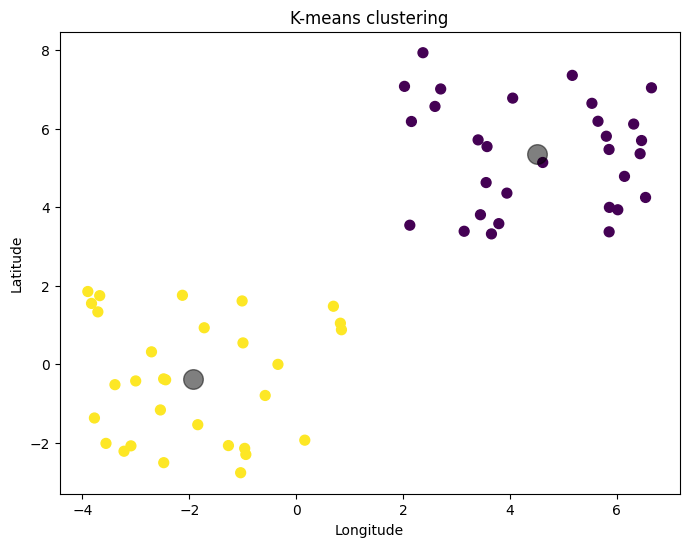

In [80]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)